In [90]:
import numpy as np
import math
import matplotlib.pyplot as plt

<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

<a name="toc_40291_2.2"></a>
## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions.
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


<a name="toc_40291_2.0.1"></a>
### Compute_Linear_model
This was developed in the last lab. We'll need it again here.

In [5]:
# Load our data set
x_train = np.array([1.0, 2.0])  #features
y_train = np.array([300.0, 500.0])  #target value

<a name="toc_40291_2.0.1"></a>
### Dataset

In [14]:
def compute_linear_model(x, w, b):
    f_wb = np.dot(x,w) + b   # vector
    return f_wb

<a name="toc_40291_2.0.1"></a>
### Compute_Cost
This was developed in the last lab. We'll need it again here.

In [85]:
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0
    err = compute_linear_model(x_train, w, b) - y    # vector
    for i in range(m):
            cost += err[i]**2
    cost = 1/(2*m) * cost   # number

    return cost

<a name="toc_40291_2.3"></a>
### compute_gradient
<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

In [45]:
def compute_gradient(x, y, w, b):

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    f_wb = compute_linear_model(x, w, b)    # vector
    err_i = f_wb - y    # vector
    for i in range(m):
        dj_dw += err_i[i] * x[i]    # number
        dj_db += err_i[i]    # number

    return dj_dw, dj_db


In [49]:
# initialize parameters
w_init = 0.4
b_init = 1.5

f_wb = compute_linear_model(x_train, w_init, b_init)
print(f"f(w,b): {f_wb}")

cost = compute_cost(x_train, y_train, w_init, b_init)
print(f"cost(w,b): {cost}")

dj_dw, dj_db = compute_gradient(x_train, y_train, w_init, b_init)
print(f"dj_dw: {dj_dw:0.3e}", f"dj_db: {dj_db:0.3e}")

f(w,b): [1.9 2.3]
error: [-298.1 -497.7]
cost(w,b): 84142.225
dj_dw: -1.294e+03 dj_db: -7.958e+02


<a name="toc_40291_2.5"></a>
###  Gradient Descent
Now that gradients can be computed,  gradient descent, described in equation (3) above can be implemented below in `gradient_descent`. The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of $w$ and $b$ on the training data.

In [81]:
def gradient_descent(x, y, w_init, b_init, alpha, iterations):

    cost_hist = []
    param_hist = []

    w = w_init
    b = b_init

    for i in range(iterations):
        # Calculates gradient
        dj_dw, dj_db = compute_gradient(x, y, w, b)    # numbers

        # Update w, b
        w = w - alpha * dj_dw    # number
        b = b - alpha * dj_db    # number

        # Saves cost and parameters
        cost_hist.append(compute_cost(x, y, w, b))
        param_hist.append([w, b])

        # Print actual values
        if i % math.ceil(iterations/10) == 0:
            print(f"iteration: {i:4}: Cost: {cost_hist[-1]:0.2e} ",
                  f"dj_dw: {dj_dw:0.3e}, dj_db: {dj_db:0.3e} ",
                  f"w: {w:0.3e}, b:{b:0.3e}")

    return w, b, cost_hist, param_hist


In [87]:
# initialize parameters
w_init = 0
b_init = 0

# some gradient descent settings
iterations = 10_000
tmp_alpha = 1.0e-2

# run gradient descent
w_final, b_final, cost_hist, param_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations)
print(f"(w,b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")

iteration:    0: Cost: 7.37e+04  dj_dw: -1.300e+03, dj_db: -8.000e+02  w: 1.300e+01, b:8.000e+00
iteration: 1000: Cost: 7.91e-01  dj_dw: -3.577e-01, dj_db: 5.788e-01  w: 1.976e+02, b:1.040e+02
iteration: 2000: Cost: 4.27e-02  dj_dw: -8.307e-02, dj_db: 1.344e-01  w: 1.994e+02, b:1.009e+02
iteration: 3000: Cost: 2.30e-03  dj_dw: -1.929e-02, dj_db: 3.121e-02  w: 1.999e+02, b:1.002e+02
iteration: 4000: Cost: 1.24e-04  dj_dw: -4.480e-03, dj_db: 7.248e-03  w: 2.000e+02, b:1.000e+02
iteration: 5000: Cost: 6.69e-06  dj_dw: -1.040e-03, dj_db: 1.683e-03  w: 2.000e+02, b:1.000e+02
iteration: 6000: Cost: 3.61e-07  dj_dw: -2.416e-04, dj_db: 3.909e-04  w: 2.000e+02, b:1.000e+02
iteration: 7000: Cost: 1.95e-08  dj_dw: -5.610e-05, dj_db: 9.077e-05  w: 2.000e+02, b:1.000e+02
iteration: 8000: Cost: 1.05e-09  dj_dw: -1.303e-05, dj_db: 2.108e-05  w: 2.000e+02, b:1.000e+02
iteration: 9000: Cost: 5.66e-11  dj_dw: -3.025e-06, dj_db: 4.895e-06  w: 2.000e+02, b:1.000e+02
(w,b) found by gradient descent: (200.0

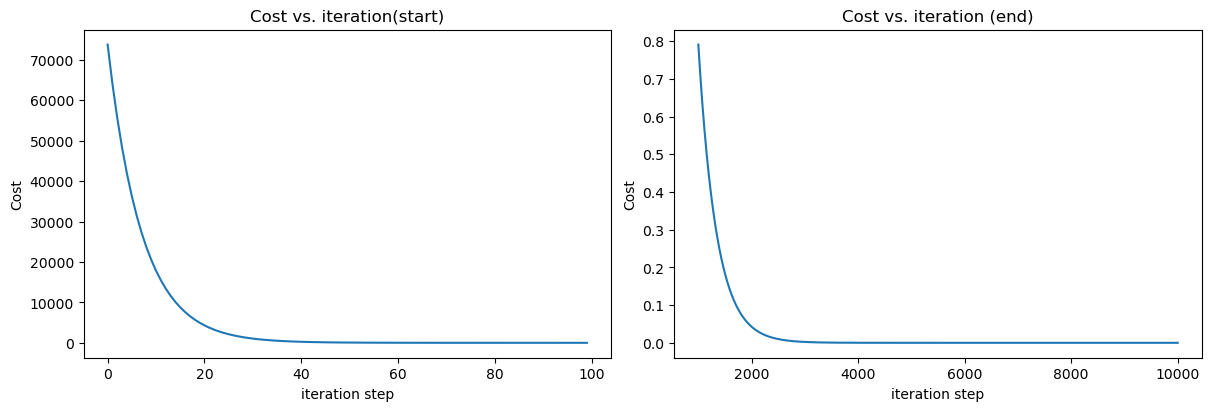

In [91]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_hist[:100])
ax2.plot(1000 + np.arange(len(cost_hist[1000:])), cost_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()